<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_03/blob/main/Lection_3_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lection 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GoIT/datasets/NY-House-Dataset.csv")
df.shape

(4801, 17)

In [5]:
df.sample(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
3145,Brokered by KELLER WILLIAMS REALTY LANDMARK II,Co-op for sale,339000,1,1.0,910.000000,68-09 Booth St Unit 6M,"Forest Hills, NY 11375","68-09 Booth St Unit 6MForest Hills, NY 11375",New York,Queens County,Queens,Forest Hills,68-09,"68-09 Booth St #6c, Forest Hills, NY 11375, USA",40.724424,-73.851108
3033,Brokered by Keller Williams Legendary,Multi-family home for sale,450000,4,2.0,2184.207862,93-04 177th St,"Jamaica, NY 11433","93-04 177th StJamaica, NY 11433",United States,New York,Queens County,Queens,177th Street,"93-04 177th St, Jamaica, NY 11433, USA",40.706560,-73.783557
2796,"Brokered by Neuhaus Realty, Inc.",Multi-family home for sale,879000,4,2.0,1824.000000,11 Edgewood Rd,"Staten Island, NY 10308","11 Edgewood RdStaten Island, NY 10308",United States,New York,Richmond County,Staten Island,Edgewood Road,"11 Edgewood Rd, Staten Island, NY 10308, USA",40.545299,-74.149251


In [6]:
data_columns=("PROPERTYSQFT", "PRICE")

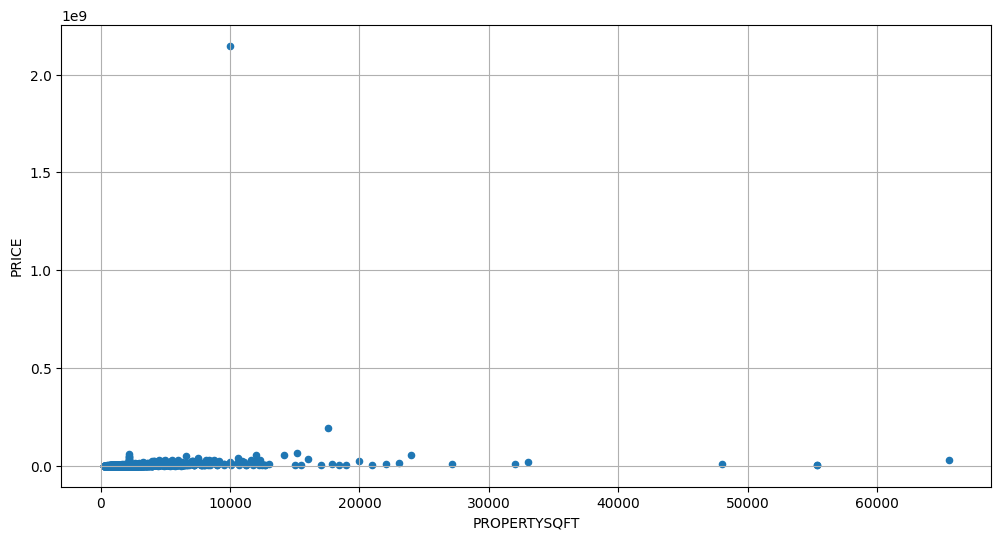

In [7]:
df.plot(x='PROPERTYSQFT', y='PRICE', kind='scatter', figsize=(12,6))
plt.grid()
plt.show()

In [8]:
mean_price = df.PRICE.mean()
mean_price

2356940.17100604

Disable scientific notaion

In [9]:
pd.options.display.float_format = '{:.0f}'.format

In [10]:
df.PRICE.describe()


count         4801
mean       2356940
std       31355246
min           2494
25%         499000
50%         825000
75%        1495000
max     2147483647
Name: PRICE, dtype: float64

In [11]:
int(df.PRICE.describe()['75%'])

1495000

In [12]:
1.495000e+06/df.PRICE.mean()

0.6342969662067712

In [13]:
limit_price = int(df.PRICE.describe()['75%']*10)
print(limit_price)

14950000


## Clean data

In [14]:
df_clear = df[df['PRICE'] < limit_price ]
df_clear.shape

(4705, 17)

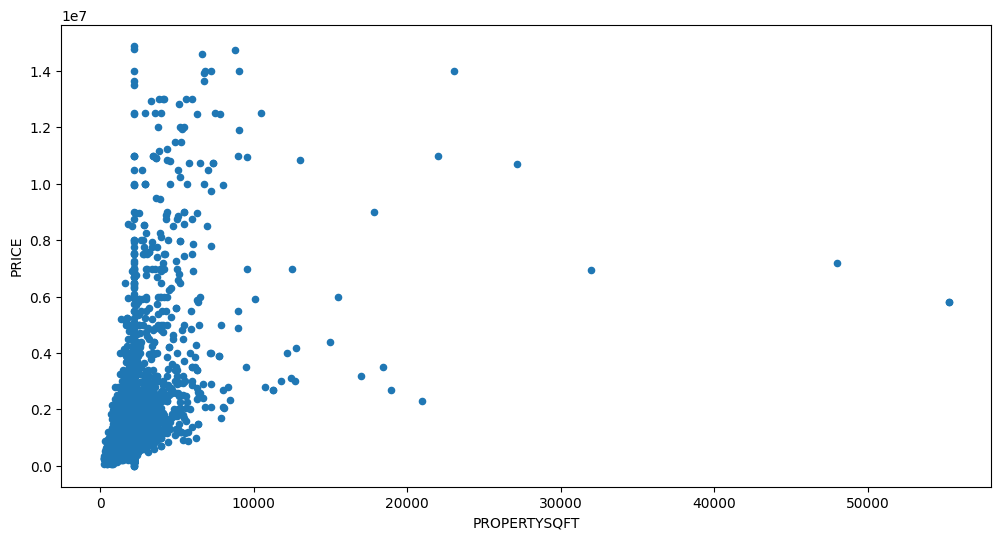

In [15]:
df_clear.plot(x='PROPERTYSQFT', y='PRICE', kind='scatter', figsize=(12,6))
plt.show()

In [16]:
df_corr = df[["PRICE","PROPERTYSQFT"]].corr()
df_corr

,PRICE,PROPERTYSQFT
PRICE,1,0
PROPERTYSQFT,0,1


## Linear regression

## Hypotesa

$$h(x) = w_0 + w_1*x$$
$$h(x) = w_0*1 + w_1*x$$

In [17]:
def h(weight, params):
  assert len(weight) == len(params)+1, "Wrong length"
  # result = weight[0]
  # for i,p in enumerate(params, start=1):
  #   print(result, i, p, weight[i], weight[i]*p)
  #   result += weight[i]*p
  result = weight[0] + weight[1]*params[0]
  return result

## Loss function

In [18]:
def loss_fuction(weight, df, columns=("PROPERTYSQFT", "PRICE")):
  n = df.shape[0]
  cost = 0
  for x, y in zip(df[columns[0]], df[columns[1]]):
    params = (x,)
    cost += (h(weight,params) - y)**2
  return cost/(2*n)

In [19]:
row = df_clear.iloc[0]
row.PRICE/row.PROPERTYSQFT

225.0

### Range of w_1

In [20]:
(df_clear.PRICE/df_clear.PROPERTYSQFT).describe()

count   4705
mean     674
std      627
min        1
25%      320
50%      481
75%      789
max     6822
dtype: float64

In [21]:
weight = (0, np.linspace(-400, 1500, 100))

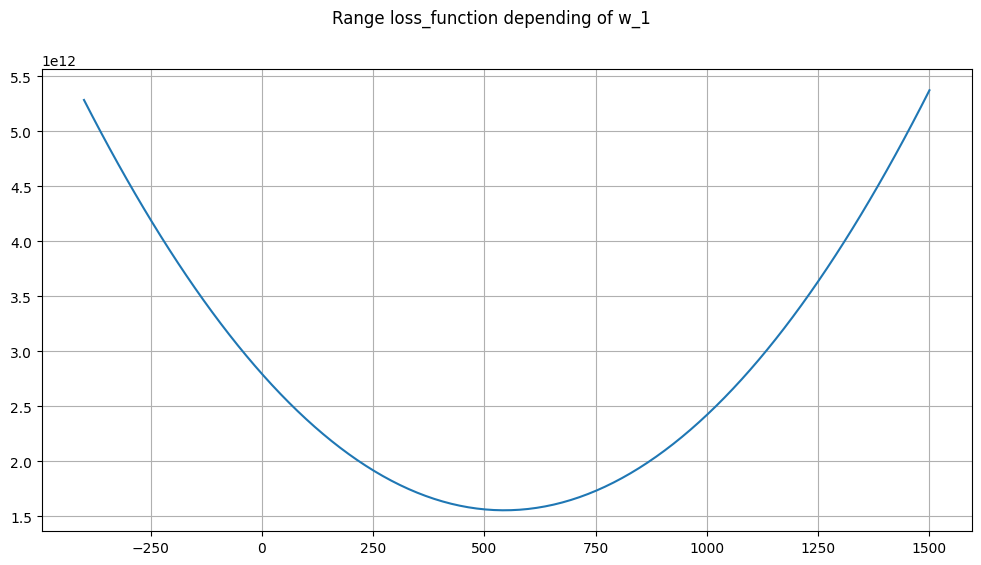

In [22]:
x = weight[1]
y = [ loss_fuction( weight=(weight[0], w), df=df_clear, columns=data_columns ) for w in x ]
fig = plt.figure(figsize=(12,6))
plt.suptitle("Range loss_function depending of w_1")
plt.grid()
plt.plot(x,y)
plt.show()

## 3D

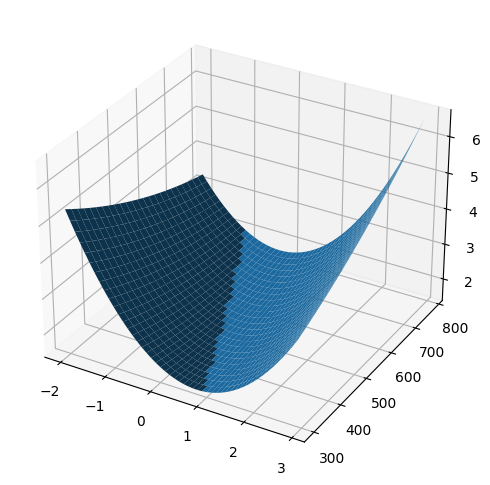

In [23]:
grid_w_0 = np.arange(-2000000, 3000000, 100000)
grid_w_1 = np.arange(300.0, 800.0, 20)

weight = np.meshgrid(grid_w_0, grid_w_1)

coord_z = loss_fuction(weight, df_clear, data_columns)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(weight[0], weight[1], coord_z)
plt.show()

## Gradiaent step

In [24]:
def grad_step(weight, grads, learning_rate=0.001):
  w_0, w_1 = weight
  grad_0, grad_1 = grads

  w_0 = w_0 - learning_rate*grad_0
  w_1 = w_1 - learning_rate*grad_1
  # weight = weight - grads * learning_rate

  return (w_0, w_1)

In [25]:
def grad_w_0(weight, df, columns=("PROPERTYSQFT", "PRICE")):
  n = df.shape[0]
  cost = 0
  for x, y in zip(df[columns[0]], df[columns[1]]):
    params = (x,)
    cost += (h(weight,params) - y)
  return cost/n

def grad_w_1(weight, df, columns=("PROPERTYSQFT", "PRICE")):
  n = df.shape[0]
  cost = 0
  for x, y in zip(df[columns[0]], df[columns[1]]):
    params = (x,)
    cost += (h(weight,params) - y)*x
  return cost/n


In [26]:
def grad_descent(weight, df, num_iter, learning_rate=0.01, epsilon=0.01, columns=("PROPERTYSQFT", "PRICE")):
  loss = loss_fuction(weight, df)
  history_loss = [loss]
  for i in range(num_iter):
    grads = (
        grad_w_0(weight, df, columns),
        grad_w_1(weight, df, columns)
        )
    # grad
    weight = grad_step(weight, grads, learning_rate=learning_rate)
    loss = loss_fuction(weight, df, columns)
    delta = abs(loss-history_loss[-1])
    if  delta < epsilon:
      print(f"{delta=}, {epsilon=}")
      history_loss.append(loss)
      break
    history_loss.append(loss)
  return weight, history_loss


In [29]:
weight = (0, 0)
try:
  weight, history_loss = grad_descent(weight, df_clear, num_iter=100, epsilon=0.0000001, columns=data_columns)
  print(f"{weight=}")
  print(f"{history_loss=}")
except Exception as err:
  print("********* ERROR:" ,err)


********* ERROR: (34, 'Numerical result out of range')


## Normalization

In [30]:
def normalization(data):
  mean = data.mean()
  value_range = data.max()-data.min()
  # result = []
  # for x in data:
  #   norm_x = (x - mean) / value_range
  #   result.append(norm_x)
  result = [ (x - mean) / value_range  for x in data ]
  return result

In [31]:
# data_columns=("PROPERTYSQFT", "PRICE")
norm = pd.DataFrame()
for col in data_columns:
  norm[col] = normalization(df_clear[col])

norm.sample(2)

,PROPERTYSQFT,PRICE
4571,0,-0
3614,0,-0


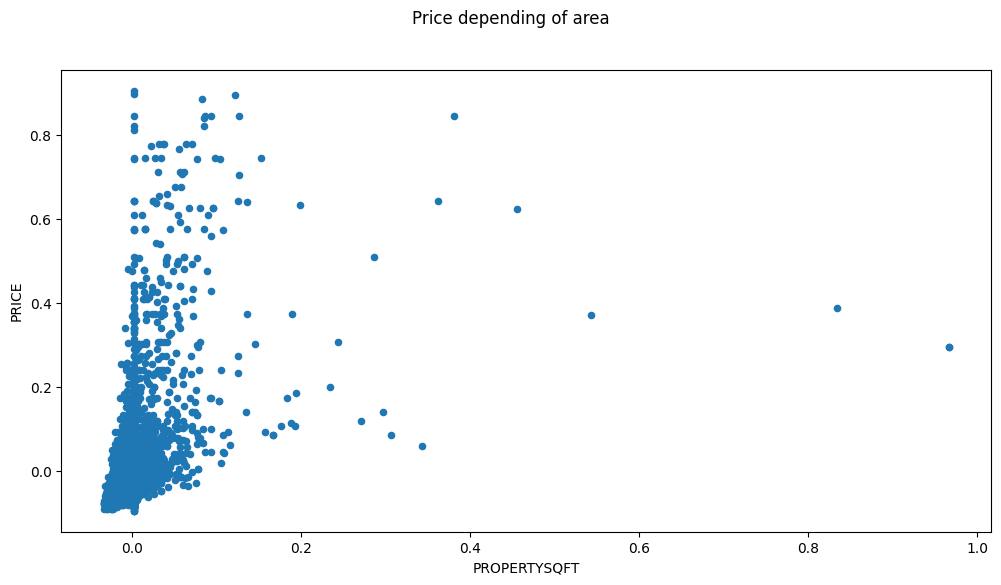

In [32]:
norm.plot(x=data_columns[0], y=data_columns[1], kind='scatter', figsize=(12,6))
plt.suptitle("Price depending of area")
plt.show()

### 3D Normalized

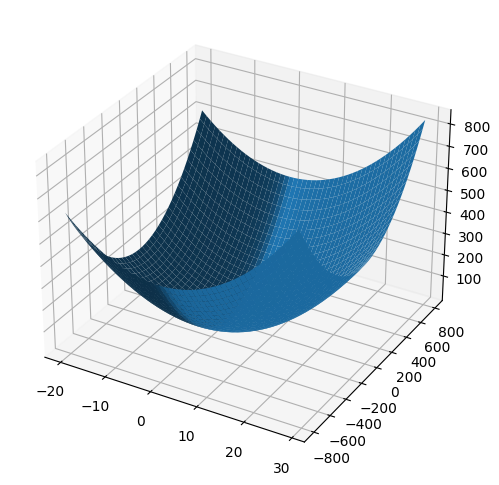

In [33]:
grid_w_0 = np.arange(-20, 30, 1)
grid_w_1 = np.arange(-800.0, 800.0, 10)

weight = np.meshgrid(grid_w_0, grid_w_1)

coord_z = loss_fuction(weight, norm, data_columns)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(weight[0], weight[1], coord_z)
plt.show()

### loss function

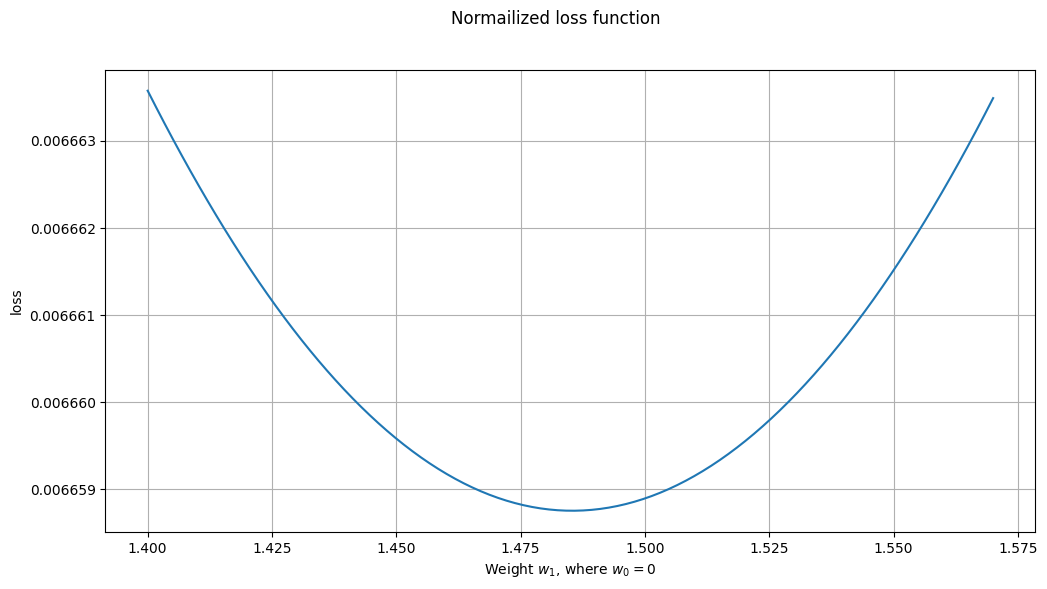

In [34]:
weight = (0, np.linspace(1.4, 1.570, 100))
x = weight[1]
y = [ loss_fuction( weight=(weight[0], w), df=norm, columns=data_columns ) for w in x ]
plt.figure(figsize=(12,6))
plt.suptitle("Normailized loss function")
plt.grid()
plt.plot(x,y)
plt.xlabel("Weight $w_1$, where $w_0=0$")
plt.ylabel("loss")
plt.show()

## Model training

In [35]:
weight = (0, 0)
weight, history_loss = grad_descent(weight, norm, num_iter=1000, learning_rate=2,  epsilon=.000000000001, columns=data_columns)
print(f"{weight=}")
print(f" {len(history_loss)=}, {history_loss[:5]=}")

weight=(-6.154865258382202e-16, 1.3803624021203686)
 len(history_loss)=1001, history_loss[:5]=[0.00811814641673603, 0.008110434071446085, 0.008102762482975876, 0.008095131435940971, 0.008087540716095213]


## Visualization

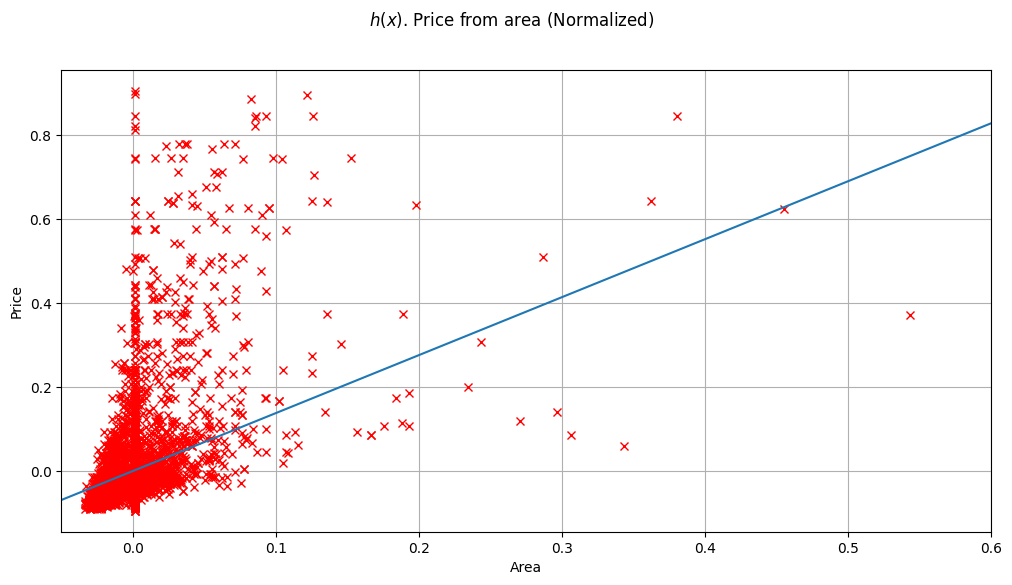

In [36]:
plt.figure(figsize=(12,6))
plt.suptitle("$h(x)$. Price from area (Normalized)")
x_limit = (-0.05, 0.6)
data_x = norm[data_columns[0]]
data_y = norm[data_columns[1]]
plt.plot(data_x, data_y, 'rx')
x = np.linspace(x_limit[0],x_limit[1],500)
plt.plot(x, h(weight,(x,)))
plt.xlim(x_limit)
plt.ylabel("Price")
plt.xlabel("Area")
plt.grid()
plt.show()

### Learing curve

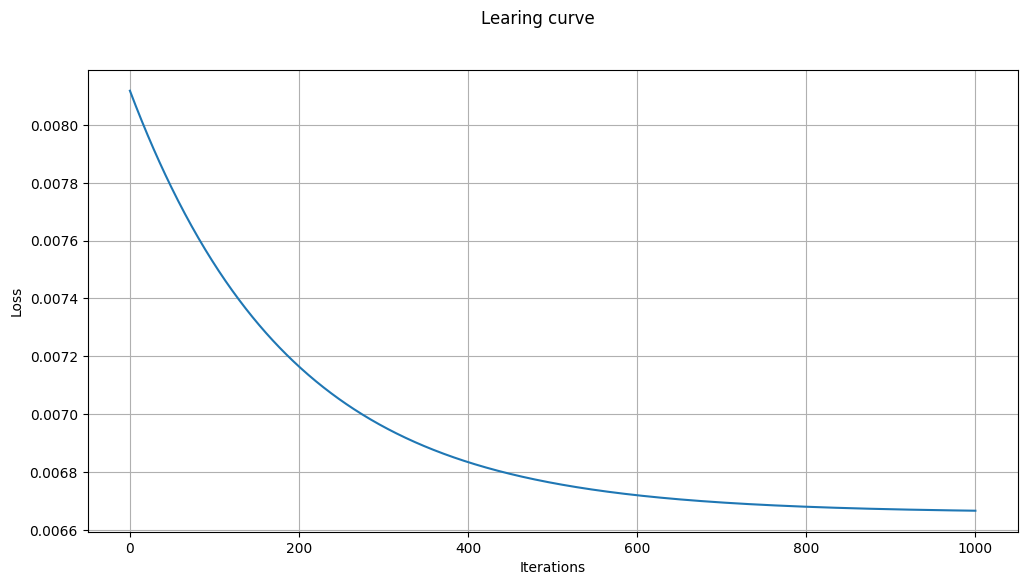

In [37]:
plt.figure(figsize=(12,6))
plt.suptitle("Learing curve")
plt.plot(history_loss)
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [38]:
weight_pt, history_loss = grad_descent(weight, norm, num_iter=2500, learning_rate=2,  epsilon=.0000000001, columns=data_columns)
weight_pt


delta=9.98865113885361e-11, epsilon=1e-10


(9.91649789795371e-18, 1.480046401076707)

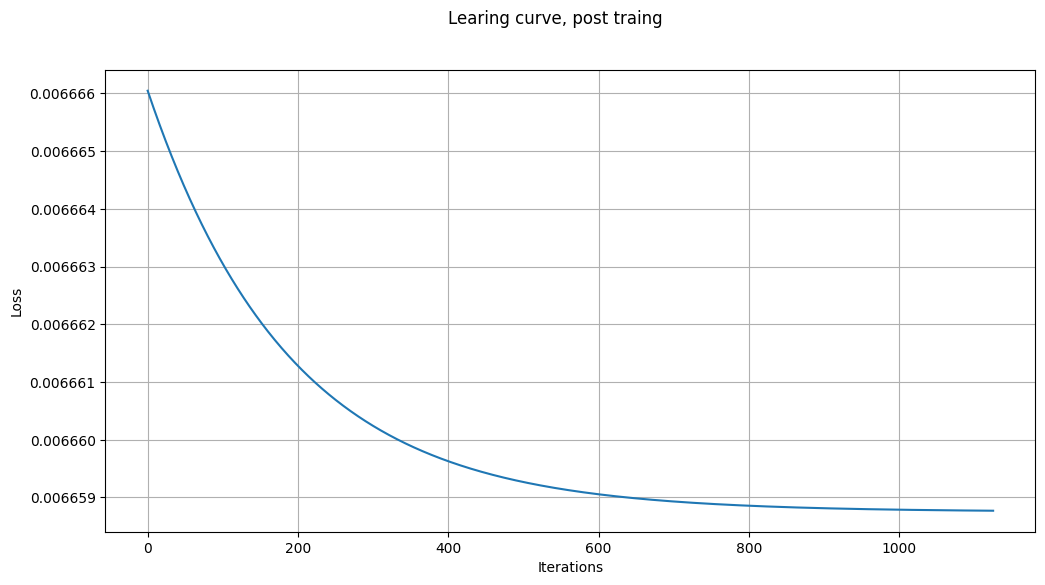

In [39]:
plt.figure(figsize=(12,6))
plt.suptitle("Learing curve, post traing")
plt.plot(history_loss)
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

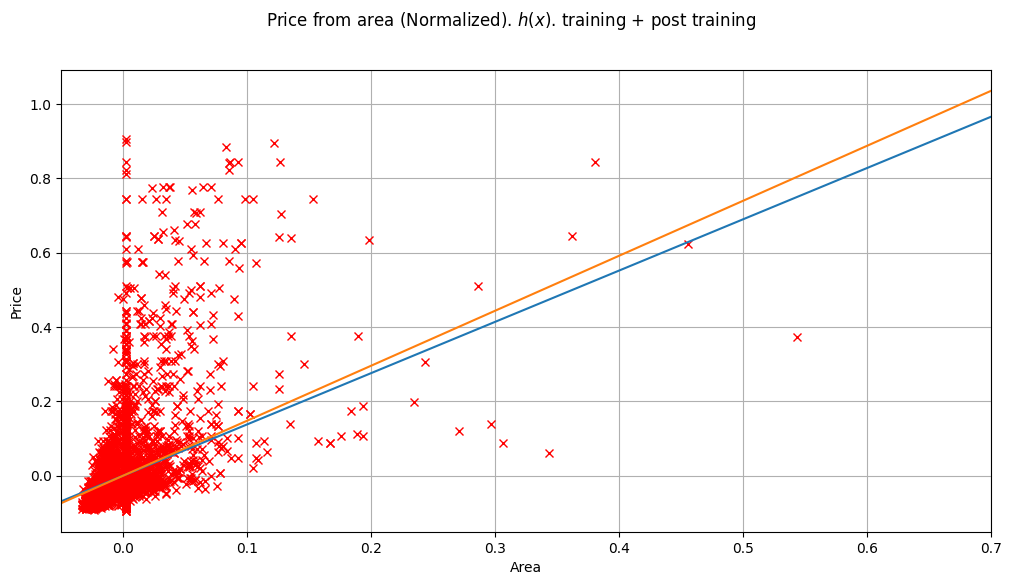

In [40]:
plt.figure(figsize=(12,6))
plt.suptitle("Price from area (Normalized). $h(x)$. training + post training")
x_limit = (-0.05, 0.7)
data_x = norm[data_columns[0]]
data_y = norm[data_columns[1]]
plt.plot(data_x, data_y, 'rx')
x = np.linspace(x_limit[0],x_limit[1],500)
plt.plot(x, h(weight,(x,)))
plt.plot(x, h(weight_pt,(x,)))
plt.xlim(x_limit)
plt.ylabel("Price")
plt.xlabel("Area")
plt.grid()
plt.show()

# SKI-KIT LEARN

In [41]:
from sklearn import linear_model

In [42]:
model = linear_model.LinearRegression()

In [43]:
X = np.array([norm[data_columns[0]]]).T
X.shape

(4705, 1)

In [44]:
Y = np.array(norm[data_columns[1]])
Y.shape

(4705,)

In [45]:
model.fit(X,Y)

LinearRegression()

In [46]:
model.coef_

array([1.48537787])

In [47]:
model.intercept_

1.9208563139146015e-18

In [48]:
model.coef_[0] - weight[1]

0.1050154644855732

In [49]:
model.coef_[0] - weight_pt[1]

0.005331465529234913

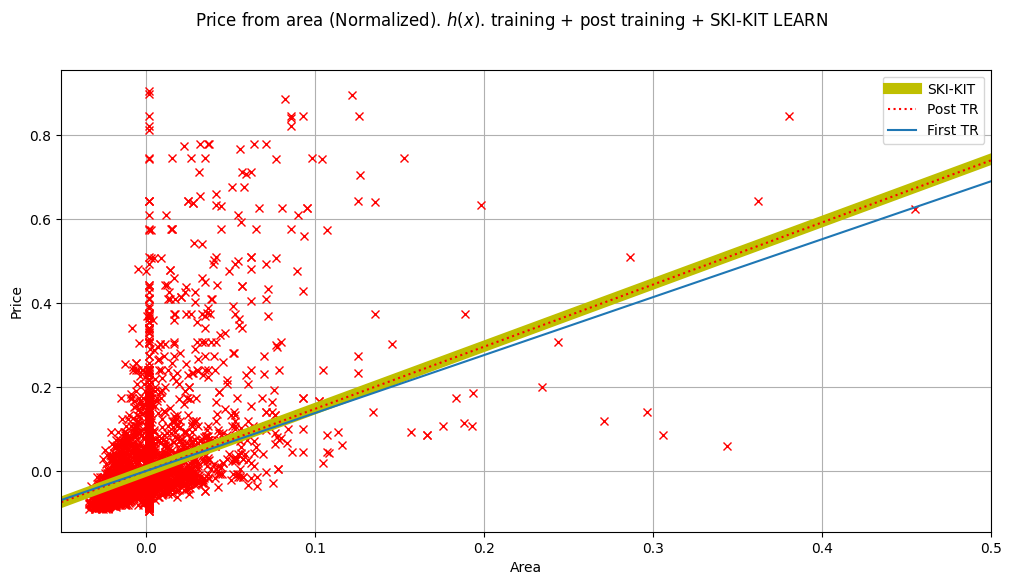

In [50]:
plt.figure(figsize=(12,6))
plt.suptitle("Price from area (Normalized). $h(x)$. training + post training + SKI-KIT LEARN")
x_limit = (-0.05, 0.5)
data_x = norm[data_columns[0]]
data_y = norm[data_columns[1]]
plt.plot(data_x, data_y, 'rx')
x = np.linspace(x_limit[0],x_limit[1],500)
plt.plot(x, h((model.intercept_, model.coef_[0]),(x,)), "y-", linewidth=8, label="SKI-KIT")
plt.plot(x, h(weight_pt,(x,)), "r:", label="Post TR")
plt.plot(x, h(weight,(x,)), label="First TR")
plt.xlim(x_limit)
plt.grid()
plt.legend()
plt.ylabel("Price")
plt.xlabel("Area")
plt.show()

In [ ]:
model = linear_model.LinearRegression()

In [59]:
X = np.array([df_clear[data_columns[0]]]).T
X.shape

(4705, 1)

In [60]:
Y = np.array(df_clear[data_columns[1]])
Y.shape

(4705,)

In [61]:
model.fit(X,Y)

LinearRegression()

In [62]:
model.coef_

array([401.82360051])

In [63]:
model.intercept_

571866.3239676829

21842


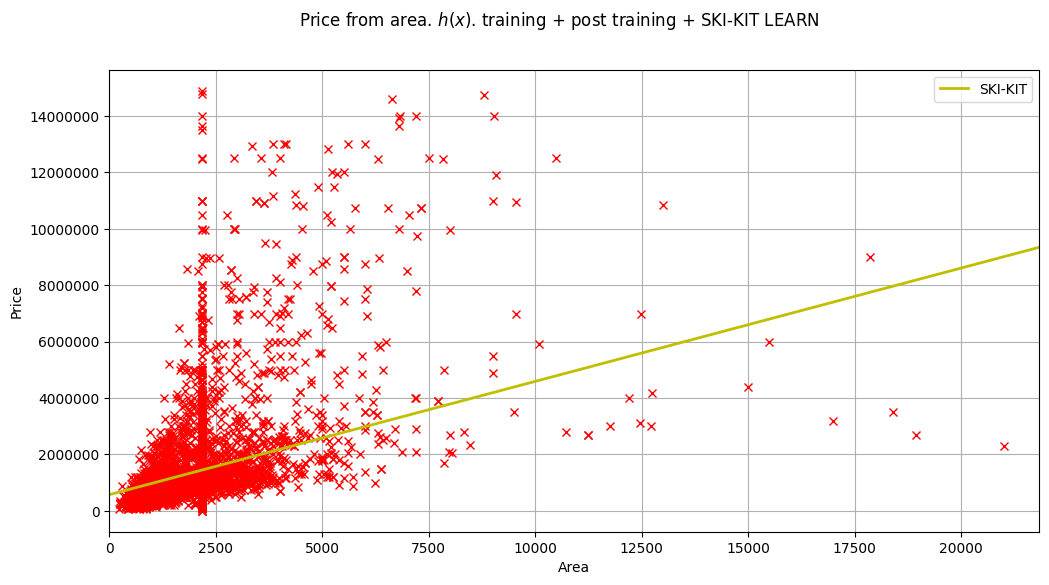

In [68]:

plt.figure(figsize=(12,6))
plt.suptitle("Price from area. $h(x)$. training + post training + SKI-KIT LEARN")
plt.ticklabel_format(scilimits=(-5, 18))
data_x = df_clear[data_columns[0]]
data_y = df_clear[data_columns[1]]
data_x_up =  int(data_x.describe()['75%']*10)
print(data_x_up)
x_limit = (0, data_x_up)
plt.plot(data_x, data_y, 'rx')
x = np.linspace(x_limit[0],x_limit[1],500)
plt.plot(x, h((model.intercept_, model.coef_[0]),(x,)), "y-", linewidth=2, label="SKI-KIT")
# plt.plot(x, h(weight_pt,(x,)), "r:", label="Post TR")
# plt.plot(x, h(weight,(x,)), label="First TR")
plt.xlim(x_limit)
plt.grid()
plt.legend()
plt.ylabel("Price")
plt.xlabel("Area")
plt.show()